In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./Aicon/02.격자단위_구급출동_dataset.csv")

In [3]:
data.head()

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX
0,38045314,380475,531475,0,20200101,4213000000,2.88,0.72,0,0,0,0,0,0,0,0
1,38045324,380475,532475,0,20200101,4213000000,9.36,1.44,0,0,0,0,0,0,0,0
2,38145354,381475,535475,0,20200101,4213000000,3.93,0.15,0,0,0,0,0,0,0,0
3,38245184,382475,518475,0,20200101,4213000000,2.69,0.16,0,0,0,0,0,0,0,0
4,38245194,382475,519475,0,20200101,4213000000,2.35,0.14,0,0,0,0,0,0,0,0


In [4]:
# data 전처리
from datetime import datetime
data['month']=data['YMD'].map(lambda x: datetime.strptime(str(x), '%Y%m%d').month)
data['day']=data['YMD'].map(lambda x: datetime.strptime(str(x), '%Y%m%d').day)

In [14]:
rect_table = pd.pivot_table(data, values= ["DSP_CNT_IDEX","RELIFPLC_DWL_IDEX","RELIFPLC_ROAD_IDEX",'RELIFPLC_INDUST_IDEX','RELIFPLC_NTR_IDEX','RELIFPLC_ETC_IDEX','DISEASE_DSP_IDEX','DISEASE_EXCL_DSP_IDEX'] , index=['GRID_ID'], aggfunc=np.sum)

In [18]:
rect_table.head()

,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX,DSP_CNT_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ETC_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ROAD_IDEX
GRID_ID,,,,,,,,
37645864,1,0,1,1,0,0,0,0
37745114,12,11,23,12,2,0,4,5
37745124,5,3,8,5,0,0,0,0
37745144,0,4,4,0,1,0,1,0
37745154,0,13,13,0,0,0,2,8


In [21]:
for i in rect_table.index:
    check=rect_table.loc[i,'DISEASE_DSP_IDEX']+rect_table.loc[i,'DISEASE_EXCL_DSP_IDEX']
    if check!=rect_table.loc[i,'DSP_CNT_IDEX']:
        print(rect_table.index(i))

In [24]:
not_list=[]
for i in rect_table.index:
    check=rect_table.loc[i,'RELIFPLC_DWL_IDEX']+rect_table.loc[i,'RELIFPLC_ETC_IDEX']+rect_table.loc[i,'RELIFPLC_INDUST_IDEX']+rect_table.loc[i,'RELIFPLC_NTR_IDEX']+rect_table.loc[i,'RELIFPLC_ROAD_IDEX']
    if check!=rect_table.loc[i,'DSP_CNT_IDEX']:
        not_list.append(i)

In [25]:
len(not_list)

305

In [30]:
sum(data['RELIFPLC_DWL_IDEX'])+sum(data['RELIFPLC_ETC_IDEX'])+sum(data['RELIFPLC_INDUST_IDEX'])+sum(data['RELIFPLC_NTR_IDEX'])+sum(data['RELIFPLC_ROAD_IDEX'])

14541

In [31]:
sum(data['DSP_CNT_IDEX'])

16474

### 구급 지수(5가지)는 제공받은 데이터가 정확하지 않아서 고려할 수 없음

# 구급빈도 월, 시간 그래프 확인

In [33]:
data.head()

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX,month,day
0,38045314,380475,531475,0,20200101,4213000000,2.88,0.72,0,0,0,0,0,0,0,0,1,1
1,38045324,380475,532475,0,20200101,4213000000,9.36,1.44,0,0,0,0,0,0,0,0,1,1
2,38145354,381475,535475,0,20200101,4213000000,3.93,0.15,0,0,0,0,0,0,0,0,1,1
3,38245184,382475,518475,0,20200101,4213000000,2.69,0.16,0,0,0,0,0,0,0,0,1,1
4,38245194,382475,519475,0,20200101,4213000000,2.35,0.14,0,0,0,0,0,0,0,0,1,1


In [43]:
rect_table = pd.pivot_table(data, values= ["DSP_CNT_IDEX"] , index=['month','TIME'], aggfunc=np.sum)

In [58]:
month_1=rect_table.query("month==1").reset_index()
month_2=rect_table.query("month==2").reset_index()

In [54]:
month_1

,month,TIME,DSP_CNT_IDEX
0,1,0,49
1,1,1,33
2,1,2,30
3,1,3,30
4,1,4,37
5,1,5,28
6,1,6,41
7,1,7,52
8,1,8,84
9,1,9,70


<function matplotlib.pyplot.show(*args, **kw)>

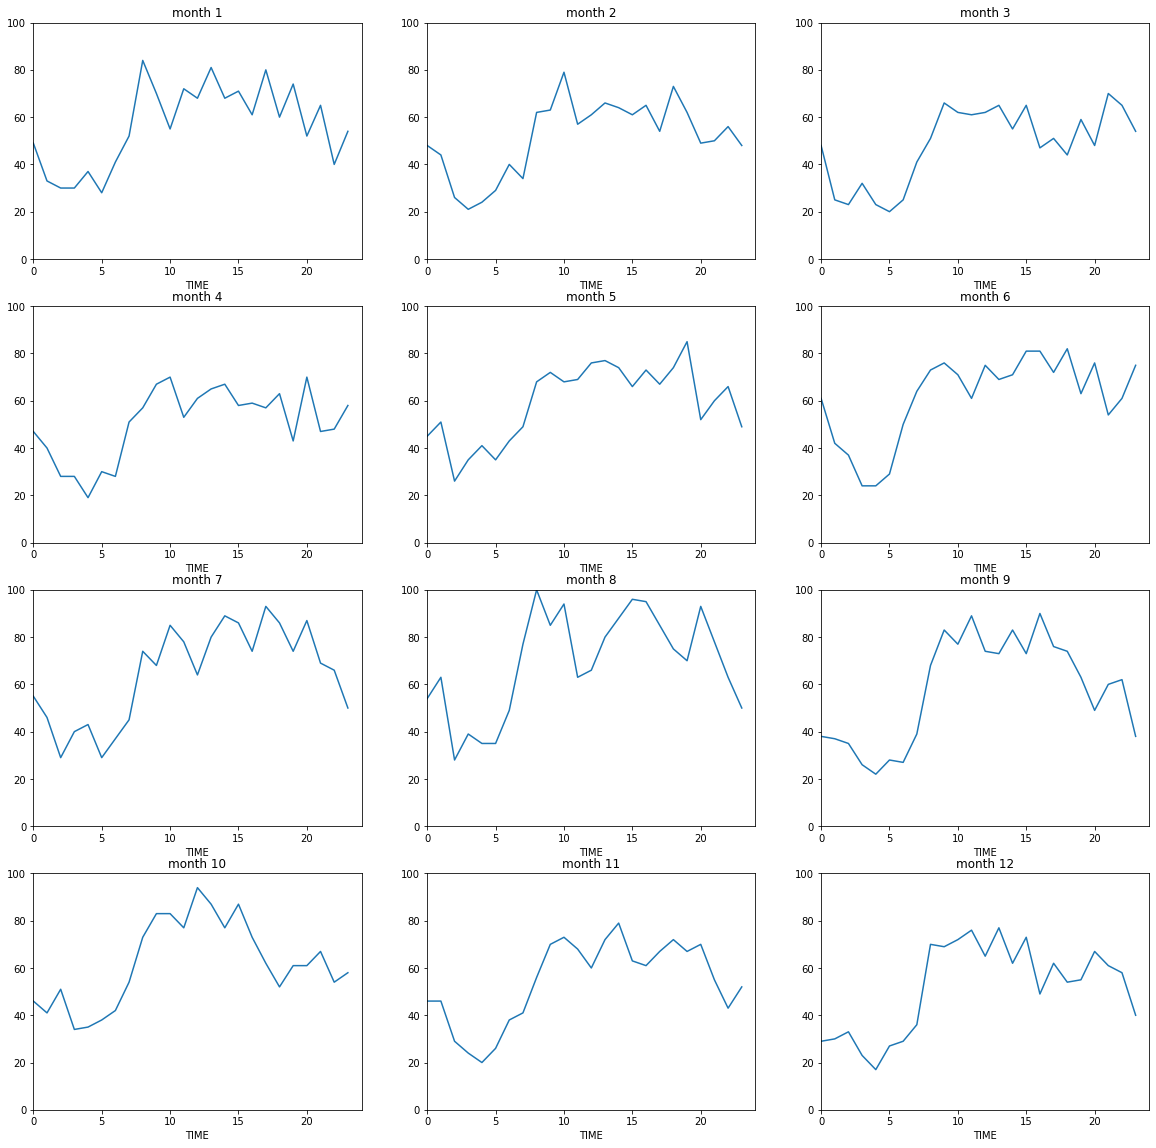

In [72]:
fig=plt.figure(figsize=(20,20))
for i in range(1, 13):
    month=rect_table.query("month==@i").reset_index()
    ax=fig.add_subplot(4,3,i)
    ax.plot(month['TIME'], month['DSP_CNT_IDEX'])
    ax.set(xlim=[0.,24.], ylim=[0.,100.])
    ax.set_title('month '+str(i))
    ax.set_xlabel('TIME')
plt.show
# 특별히 낮은 시간대, 높은 시간대가 전체적으로 형성되어 있다고 판단 됨

In [77]:
time=list(month_1['TIME'].values)

In [117]:
# 시간별 가설 검증
month_dic={}
total=data.groupby(['month','day','TIME'])['DSP_CNT_IDEX'].sum().reset_index()
for (m,t), group in temp.groupby(['month','TIME']):
    if m not in month_dic.keys():
        month_dic[m]=group.reset_index(drop=True)
    else:
        month_dic[m]=pd.concat([month_dic[m],group.reset_index(drop=True)], axis=0)
        month_dic[m].reset_index(inplace=True, drop=True)

In [118]:
month_dic[1].query('TIME==0')

,month,day,TIME,DSP_CNT_IDEX
0,1,1,0,5
1,1,2,0,1
2,1,3,0,1
3,1,4,0,0
4,1,5,0,4
5,1,6,0,2
6,1,7,0,0
7,1,8,0,2
8,1,9,0,1
9,1,10,0,1


In [109]:
month_dic_1 = pd.pivot_table(month_dic[1], values= ["DSP_CNT_IDEX"] , index=['TIME'], aggfunc=np.mean)

In [110]:
month_dic_1

,DSP_CNT_IDEX
TIME,
0,1.633333
1,1.100000
2,1.000000
3,1.000000
4,1.233333
5,0.933333
6,1.366667
7,1.733333
8,2.800000


In [119]:
temp=month_dic[1].query("TIME==0")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F50B2D220>,
      dtype=object)

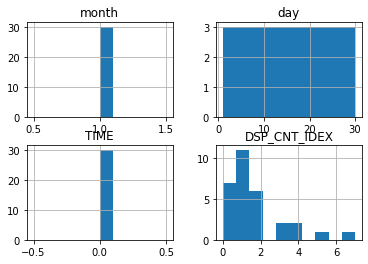

In [124]:
temp.hist()

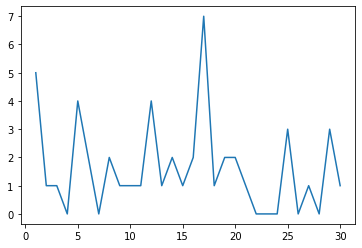

In [123]:
plt.plot(temp['day'],temp['DSP_CNT_IDEX'])

In [136]:
data

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TIME,YMD,STDG_CD,FP_IDEX,OLD_FP_IDEX,RELIFPLC_DWL_IDEX,RELIFPLC_ROAD_IDEX,RELIFPLC_INDUST_IDEX,RELIFPLC_NTR_IDEX,RELIFPLC_ETC_IDEX,DSP_CNT_IDEX,DISEASE_DSP_IDEX,DISEASE_EXCL_DSP_IDEX,month,day
0,38045314,380475,531475,0,20200101,4213000000,2.88,0.72,0,0,0,0,0,0,0,0,1,1
1,38045324,380475,532475,0,20200101,4213000000,9.36,1.44,0,0,0,0,0,0,0,0,1,1
2,38145354,381475,535475,0,20200101,4213000000,3.93,0.15,0,0,0,0,0,0,0,0,1,1
3,38245184,382475,518475,0,20200101,4213000000,2.69,0.16,0,0,0,0,0,0,0,0,1,1
4,38245194,382475,519475,0,20200101,4213000000,2.35,0.14,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769073,40245274,402475,527475,23,20201230,4213000000,25.48,1.04,0,0,0,0,0,0,0,0,12,30
1769074,40545364,405475,536475,23,20201230,4213000000,1.21,0.32,0,0,0,0,0,0,0,0,12,30
1769075,40645144,406475,514475,23,20201230,4213000000,1.28,0.30,0,0,0,0,0,0,0,0,12,30
1769076,40745144,407475,514475,23,20201230,4213000000,6.17,1.47,0,0,0,0,0,0,0,0,12,30


In [125]:
total=data.groupby(['GRID_ID','month','day','TIME'])['FP_IDEX'].sum().reset_index()

In [137]:
total

,GRID_ID,month,day,TIME,FP_IDEX
0,37645864,1,4,9,0.00
1,37745114,1,3,12,2.07
2,37745114,1,3,13,4.35
3,37745114,1,5,13,0.00
4,37745114,1,7,10,3.09
...,...,...,...,...,...
1769073,44145094,7,9,18,0.00
1769074,44945564,2,18,17,0.00
1769075,45045614,10,9,20,0.00
1769076,48845074,12,18,15,0.00


In [127]:
total.query("GRID_ID==3853124")

,GRID_ID,month,day,TIME,FP_IDEX


In [135]:
total.query("GRID_ID==37745114 and month==1 and TIME==12")

,GRID_ID,month,day,TIME,FP_IDEX
1,37745114,1,3,12,2.07
6,37745114,1,7,12,5.37
8,37745114,1,10,12,3.24
11,37745114,1,15,12,4.33
12,37745114,1,16,12,1.06
14,37745114,1,24,12,4.47
31,37745114,1,25,12,5.33
38,37745114,1,26,12,3.12
